In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Read in the data files.  First varying precision at fixed number of quadrature points:

In [2]:
data64 = np.loadtxt("maxwell_p64_npts200.txt")
data80 = np.loadtxt("maxwell_p80_npts200.txt")
data128 = np.loadtxt("maxwell_p128_npts200.txt")
data256 = np.loadtxt("maxwell_p256_npts200.txt")

Now varying quadrature points at fixed precision:

In [3]:
bits = 128

In [4]:
data20 = np.loadtxt(f"maxwell_p{bits}_npts20.txt")
data50 = np.loadtxt(f"maxwell_p{bits}_npts50.txt")
data100 = np.loadtxt(f"maxwell_p{bits}_npts100.txt")
data200 = np.loadtxt(f"maxwell_p{bits}_npts200.txt")
data400 = np.loadtxt(f"maxwell_p{bits}_npts400.txt")

Find the unique temperatures, and skip over some values using a stride of 2---all runs should be the same.

In [5]:
Ts = sorted(list(set(data64[:, 0])))
Ts = Ts[::2]
Ts

[np.float64(10000.0),
 np.float64(1000000.0),
 np.float64(100000000.0),
 np.float64(10000000000.0)]

A helper function to make pretty output for numbers

In [6]:
def sci_notation(num, precision=0):
    if num == 0:
        return "$0$"
    
    # Get scientific notation components
    fmt = f"{{:.{precision}e}}"
    mantissa_str, exp_str = fmt.format(num).split("e")
    mantissa = float(mantissa_str)
    exponent = int(exp_str)
    
    # Build LaTeX string
    if mantissa == 1:
        return rf"$10^{{{exponent}}}$"
    else:
        return rf"${mantissa} \times 10^{{{exponent}}}$"

Setup the figure.  We'll use a layout with 2 columns, with temperature varying along rows.

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(10, 12))

<Figure size 1000x1200 with 0 Axes>

In [8]:
gs = mpl.gridspec.GridSpec(nrows=len(Ts), ncols=2, figure=fig)

Which Maxwell relation are we looking at?

In [9]:
icol = 3

In [10]:
if icol == 2:
    relation = r"$|p - \rho^2 \partial e / \partial \rho |_T + T \partial p / \partial T |_\rho| / |p|$"
elif icol == 3:
    relation = r"|$\partial e / \partial T |_\rho - T \partial s / \partial T |_\rho| / |\partial e / \partial T |_\rho|$"
elif icol == 4:
    relation = r"$|-\partial s /\partial \rho |_T - 1/\rho^2 \partial p / \partial T |_\rho| / |\partial s /\partial \rho |_T|$"

Do the prevision plots

In [11]:
for n, T in enumerate(Ts):
    ax = fig.add_subplot(gs[n, 0])
    idx = np.where(data64[:, 0] == Ts[n])
    ax.scatter(data64[idx, 1], data64[idx, icol], label="64-bit")
    ax.scatter(data80[idx, 1], data80[idx, icol], label="80-bit")
    ax.scatter(data128[idx, 1], data128[idx, icol], label="128-bit")
    ax.scatter(data256[idx, 1], data256[idx, icol], label="256-bit")    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.text(0.02, 0.9, f"T = {sci_notation(T)} K", transform=ax.transAxes,
            fontsize="large",
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax.grid(ls=":")
    if n < len(Ts)-1:
        ax.xaxis.set_ticklabels([])
    else:
        ax.set_xlabel(r"$\rho\ (\mathrm{g\ cm}^{-3})$")
    if n == 0:
        ax.legend()
        ax.set_title("floating-point precision")
    ax.set_ylabel(relation)

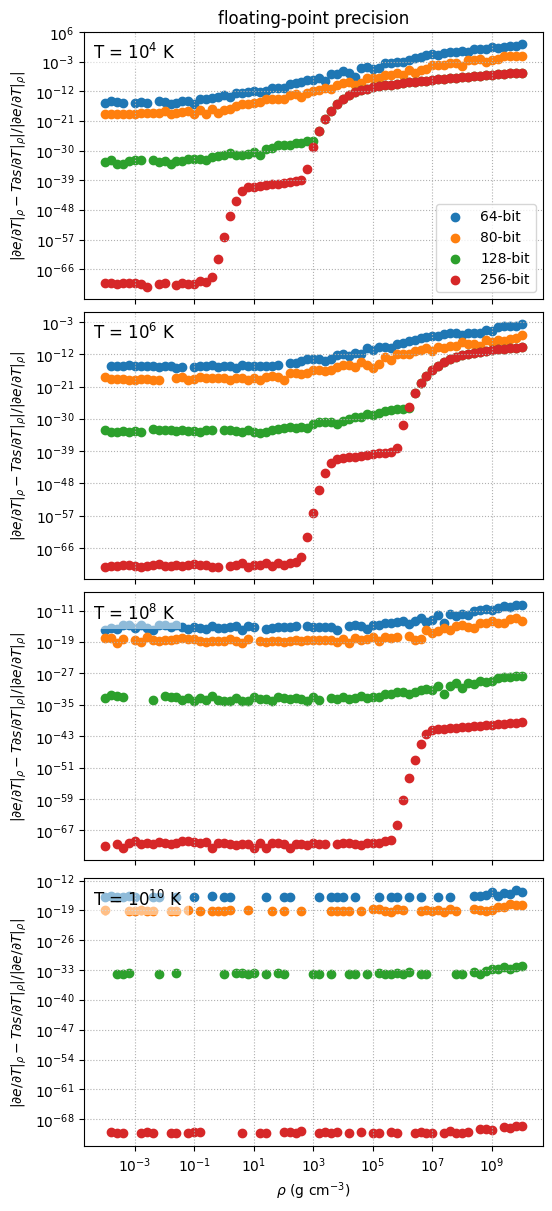

In [12]:
fig

Now the quadrature version

In [13]:
for n, T in enumerate(Ts):
    ax = fig.add_subplot(gs[n, 1])
    idx = np.where(data50[:, 0] == Ts[n])
    ax.scatter(data20[idx, 1], data20[idx, icol], label="20 points", marker="^")
    ax.scatter(data50[idx, 1], data50[idx, icol], label="50 points", marker="^")
    ax.scatter(data100[idx, 1], data100[idx, icol], label="100 points", marker="^")
    ax.scatter(data200[idx, 1], data200[idx, icol], label="200 points", marker="^")
    ax.scatter(data400[idx, 1], data400[idx, icol], label="400 points", marker="^")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.text(0.02, 0.9, f"T = {sci_notation(T)} K", transform=ax.transAxes,
            fontsize="large",
            bbox=dict(facecolor='white', alpha=0.4, edgecolor='none'))
    ax.grid(ls=":")
    if n < len(Ts)-1:
        ax.xaxis.set_ticklabels([])
    else:
        ax.set_xlabel(r"$\rho\ (\mathrm{g\ cm}^{-3})$")
    if n == 0:
        ax.legend()
        ax.set_title("number of quadrature points")
    #ax.yaxis.set_ticklabels([])

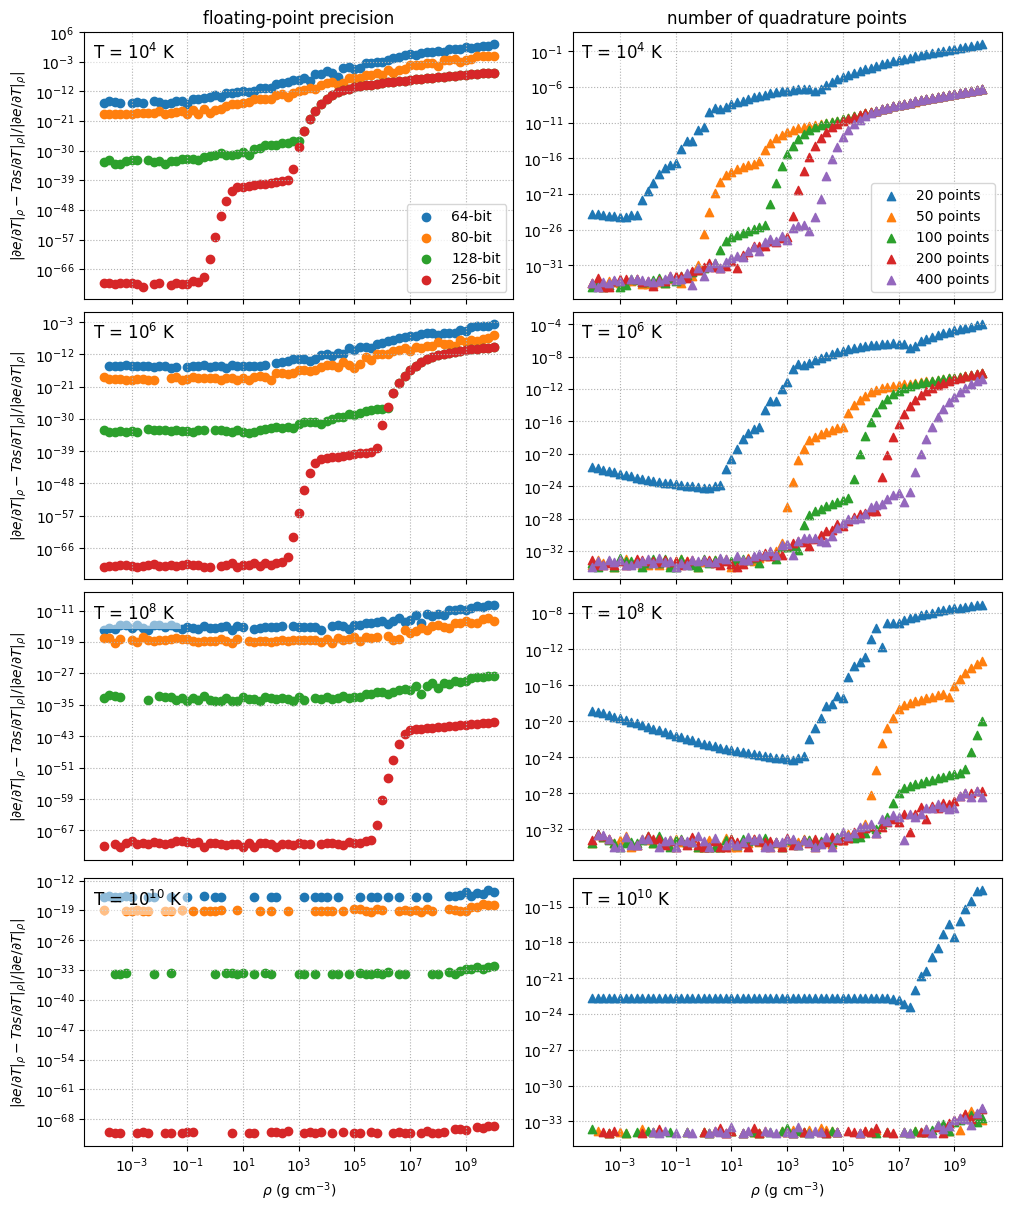

In [14]:
fig

In [15]:
fig.savefig("maxwell-precision.pdf")